In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
path = "/content/dataset_tipo_1.csv"
dataset = pd.read_csv(path)

dataset

,ts,CondutividadeEletrica,Temperatura,pH,NivelBoiaBaixa,NivelBoiaAlta,Dia,tipo_alface,Quant_folhas,Altura_folha,Comprimento_folha,Id_alface
0,2024-12-31T17:43:37.826000Z,810,30.06,7.17,1,1,1,Crespa Verde,6,5.1,2.8,1
1,2024-12-31T17:43:22Z,800,30.06,7.24,1,1,1,Crespa Roxo,7,3.8,2.5,2
2,2024-12-31T17:42:50.262000Z,813,30.00,7.18,1,1,1,Crespa Verde,7,3.8,2.1,3
3,2024-12-31T17:42:34.491000Z,806,30.06,7.16,1,1,1,Crespa Roxo,6,3.8,2.8,4
4,2024-12-31T17:42:02.669000Z,806,30.06,7.17,1,1,1,Crespa Verde,7,4.0,2.8,5
...,...,...,...,...,...,...,...,...,...,...,...,...
993,2025-01-19T18:15:37.306000Z,1787,28.81,7.16,1,0,20,Crespa Roxo,9,7.0,5.9,4
994,2025-01-19T18:15:05.593000Z,1812,28.75,7.16,1,0,20,Crespa Verde,8,6.5,5.0,5
995,2025-01-19T18:14:49.730000Z,1854,28.75,7.16,1,0,20,Crespa Roxo,7,6.5,6.7,6
996,2025-01-19T18:14:18.020000Z,1910,28.81,7.15,1,0,20,Crespa Verde,8,6.5,5.0,5


#Predições


## Quantidade de Folhas


In [3]:
#Seleção do alface pelo Id
df_alface_1 = dataset.loc[dataset.Id_alface == 1]

X = df_alface_1.drop(["ts", "NivelBoiaBaixa", "NivelBoiaAlta", "Quant_folhas", "Altura_folha", "Comprimento_folha", "Id_alface", "tipo_alface"], axis = 1)

#Seleção do Target
#y = df_alface_1["Quant_folhas"]
#y = df_alface_1["Altura_folha"]
y = df_alface_1["Comprimento_folha"]

#colunas = X.columns
#x = X.values
#x_scale = MinMaxScaler().fit_transform(x)

#Feactures noramlizadas para treinamento dos modelos
#x_normalizado = pd.DataFrame(data = x_scale, columns = colunas)

x_normalizado = X

x_normalizado

,CondutividadeEletrica,Temperatura,pH,Dia
0,810,30.06,7.17,1
6,806,30.06,7.22,1
12,835,30.06,7.21,1
18,834,30.12,7.21,1
24,838,30.12,7.21,1
...,...,...,...,...
966,1632,28.81,7.15,20
972,1707,28.81,7.16,20
978,1716,28.75,7.16,20
984,1756,28.75,7.14,20


In [4]:
X_train, X_test, y_train, y_test = train_test_split(x_normalizado, y, test_size = 0.1, random_state = None) #shuffle

X_test

,CondutividadeEletrica,Temperatura,pH,Dia
850,1354,27.44,7.89,17
664,2043,29.06,6.35,14
318,1407,28.06,6.86,7
274,1309,29.50,6.37,7
41,1092,29.06,8.02,3
238,1042,29.38,7.97,6
199,1330,27.50,7.98,5
634,899,28.00,7.88,13
783,1135,27.88,7.84,15
826,1184,28.12,8.07,16


In [7]:
linear_results = []
tree_results = []
knn_results = []
randomforest_results = []
boosting_results = []
svr_results = []

for _ in range(25):

  X_train, X_test, y_train, y_test = train_test_split(x_normalizado, y, test_size = 0.05)

  regressor1=LinearRegression()
  regressor1.fit(X_train,y_train)
  linear_results.append(regressor1.score(X_test, y_test))

  regressor2=DecisionTreeRegressor(criterion='squared_error', max_depth=5)
  regressor2.fit(X_train,y_train)
  tree_results.append(regressor2.score(X_test, y_test))

  regressor3=KNeighborsRegressor(n_neighbors=4, metric='euclidean', algorithm='brute')
  regressor3.fit(X_train, y_train)
  knn_results.append(regressor3.score(X_test, y_test))

  regressor4 = RandomForestRegressor() #(criterion = 'squared_error', max_depth = 7)
  regressor4.fit(X_train, y_train)
  randomforest_results.append(regressor4.score(X_test, y_test))

  regressor5 = GradientBoostingRegressor()
  regressor5.fit(X_train, y_train)
  boosting_results.append(regressor5.score(X_test, y_test))

  regressor6 = SVR(kernel = "poly", degree = 2)
  regressor6.fit(X_train, y_train)
  svr_results.append(regressor6.score(X_test, y_test))

In [8]:
print("RESULTADOS: ")
lin = np.mean(linear_results)
tree = np.mean(tree_results)
knn = np.mean(knn_results)
flores = np.mean(randomforest_results)
boos = np.mean(boosting_results)
sv = np.mean(svr_results)

print(f"Média dos scores das Regressões Lineares {lin}")
print(f"Média dos scores das Árvores de Regressão {tree}")
print(f"Média dos scores dos KNN {knn}")
print(f"Média dos scores das Florestas Aleatórias {flores}")
print(f"Média dos scores do Gradiente Boosting {boos}")
print(f"Média dos scores do Suport vector {sv}")

RESULTADOS: 
Média dos scores das Regressões Lineares 0.8664887394374238
Média dos scores das Árvores de Regressão 0.9998320547377151
Média dos scores dos KNN 0.6530846401669596
Média dos scores das Florestas Aleatórias 0.9988805157045069
Média dos scores do Gradiente Boosting 0.999083479722267
Média dos scores do Suport vector 0.09244600799449942


#Alguns Graficos com as predições dos modelos e os dados reais

##Gráficos de curvas (Descartar)

In [9]:
predicoes = regressor1.predict(X_test)
print(predicoes)
print()
reais = list(y_test)
print(reais)

[4.82607782 6.54232659 6.78388035 5.75080298 7.54275931 8.8864334
 4.27363743 4.17300337 7.31558058]

[4.2, 7.2, 7.2, 6.2, 7.2, 9.0, 4.2, 4.2, 7.2]


In [10]:
dict_d = { "Dia" : X_test['Dia'], "Preditos" : predicoes, "Reais" : reais}
date = pd.DataFrame(dict_d)
date = date.reset_index().drop(["index"], axis = 1).sort_values(by = "Dia")
#d.sort_values(by = "Dia")
date

,Dia,Preditos,Reais
6,4,4.273637,4.2
7,4,4.173003,4.2
0,5,4.826078,4.2
3,7,5.750803,6.2
1,12,6.542327,7.2
2,13,6.783880,7.2
4,14,7.542759,7.2
8,15,7.315581,7.2
5,20,8.886433,9.0


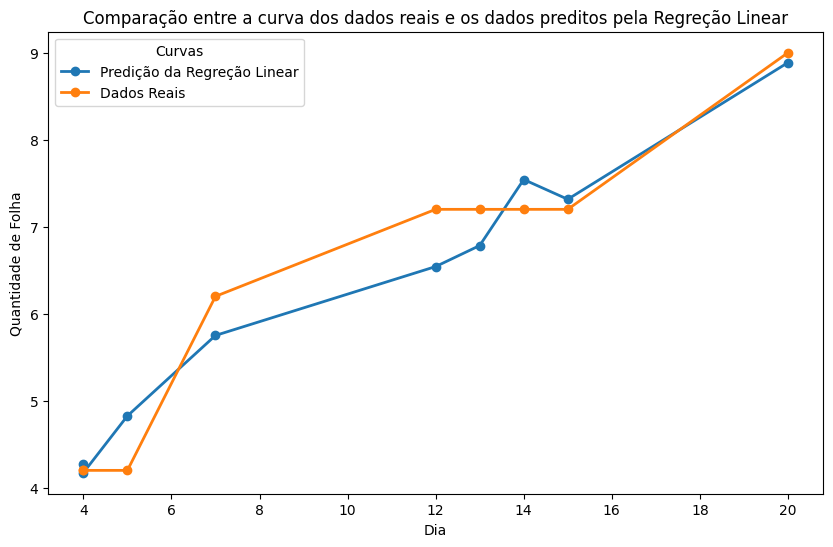

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Gráfico de linha para o comprimento das folhas
plt.figure(figsize=(10, 6))
plt.plot(date['Dia'], date['Preditos'], label=f'Predição da Regreção Linear', marker = 'o', markersize = 6, linewidth = 2)
plt.plot(date['Dia'], date['Reais'], label=f'Dados Reais', marker = 'o', markersize = 6, linewidth = 2)

plt.title('Comparação entre a curva dos dados reais e os dados preditos pela Regreção Linear')
plt.xlabel('Dia')
plt.ylabel('Quantidade de Folha')
plt.legend(title='Curvas')
plt.grid(False)
plt.show()


#Baterias de Testes

In [ ]:
dataset = pd.read_csv(path)

#Criação do dataframe pandas para os resultados
dict_new = {"Modelo": [0],
            "score": [0],
            "Id_alface": [0]
            }

dados = pd.DataFrame(dict_new)

In [ ]:
for i in range(0, 6):
  df_alface = dataset.loc[dataset.Id_alface == i + 1]

  X = df_alface.drop(["ts", "NivelBoiaBaixa", "NivelBoiaAlta", "Quant_folhas", "Altura_folha", "Comprimento_folha", "Id_alface", "tipo_alface"], axis = 1)

  #Seleção do Target
  y = df_alface["Quant_folhas"]
  #y = df_alface_1["Altura_folha"]
  #y = df_alface_1["Comprimento_folha"]

  colunas = X.columns
  x = X.values
  x_scale = MinMaxScaler().fit_transform(x)

  #Feactures noramlizadas para treinamento dos modelos
  x_normalizado = pd.DataFrame(data = x_scale, columns = colunas)

  #Listas para guardar os resultados dos modelos
  linear_results = []
  tree_results = []
  knn_results = []
  randomforest_results = []
  boosting_results = []
  svr_results = []

  #Treinamentos dos modelos varias vezes
  for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(x_normalizado, y, test_size = 0.2, random_state = None)

    regressor1=LinearRegression()
    regressor1.fit(X_train,y_train)
    linear_results.append(regressor1.score(X_test, y_test))

    regressor2=DecisionTreeRegressor(criterion='squared_error', max_depth=5)
    regressor2.fit(X_train,y_train)
    tree_results.append(regressor2.score(X_test, y_test))

    regressor3=KNeighborsRegressor(n_neighbors=3, metric='euclidean', algorithm='brute')
    regressor3.fit(X_train, y_train)
    knn_results.append(regressor3.score(X_test, y_test))

    regressor4 = RandomForestRegressor() #(criterion = 'squared_error', max_depth = 7)
    regressor4.fit(X_train, y_train)
    randomforest_results.append(regressor4.score(X_test, y_test))

    regressor5 = GradientBoostingRegressor()
    regressor5.fit(X_train, y_train)
    boosting_results.append(regressor5.score(X_test, y_test))

    regressor6 = SVR(kernel = "poly", degree = 2) #, gamma="auto", C = 1.0)
    regressor6.fit(X_train, y_train)
    svr_results.append(regressor6.score(X_test, y_test))

  #Adiconando ao dataframe que vai gerar o gráfico
  dados.loc[len(dados)] = {"Modelo": "MultipleLinear", "score": np.mean(linear_results), "Id_alface": i + 1}
  dados.loc[len(dados)] = {"Modelo": "SuportVector", "score": np.mean(svr_results), "Id_alface": i + 1}
  dados.loc[len(dados)] = {"Modelo": "DecisionTree", "score": np.mean(tree_results), "Id_alface": i + 1}
  dados.loc[len(dados)] = {"Modelo": "KNN", "score": np.mean(knn_results), "Id_alface": i + 1}
  dados.loc[len(dados)] = {"Modelo": "RandonForest", "score": np.mean(randomforest_results), "Id_alface": i + 1}
  dados.loc[len(dados)] = {"Modelo": "GradienBoosting", "score": np.mean(boosting_results), "Id_alface": i + 1}

dados = dados.drop([0])

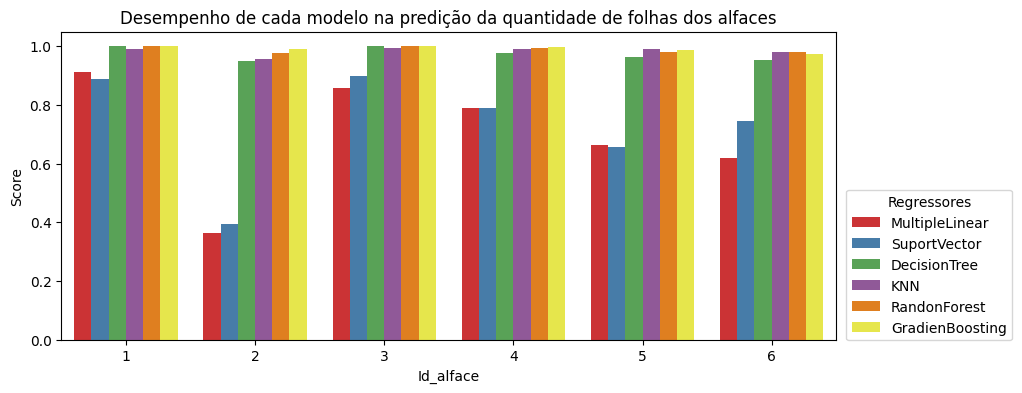

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para Quantidade de Folhas por Dia, agrupado por ID de Alface
plt.figure(figsize=(10, 4))
sns.barplot(data=dados, x='Id_alface', y='score', hue='Modelo', palette='Set1') #palette = 'Blues'
plt.title('Desempenho de cada modelo na predição da quantidade de folhas dos alfaces')
plt.xlabel('Id_alface')
plt.ylabel('Score')
plt.legend(title='Regressores', loc='lower center', bbox_to_anchor=(1.12, -0.025))

#for p in plt.gca().patches:
#    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                       ha='center', va='center', fontsize=10, color='black', fontweight='bold')

plt.grid(False)
plt.show()

In [ ]:
dados

,Modelo,score,Id_alface
1,MultipleLinear,0.911403,1
2,SuportVector,0.888548,1
3,DecisionTree,1.000000,1
4,KNN,0.989343,1
5,RandonForest,0.999712,1
6,GradienBoosting,0.999932,1
7,MultipleLinear,0.362318,2
8,SuportVector,0.394601,2
9,DecisionTree,0.948962,2
10,KNN,0.955539,2
